In [181]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [182]:
%matplotlib inline

In [183]:
os.getcwd()

'/users/ug14/iamutkarsh/fila-lab/3/code'

In [184]:
resultDir = os.getcwd() + '/results'

In [185]:
algos = os.listdir(resultDir)
count = 0

In [186]:
for algo in algos:
    algodir = resultDir + '/' + algo
    for file in os.listdir(algodir):
        try:
            if len(open(algodir + '/' + file ).readlines()) != 7:
                print("file", file, algo)
            else:
                count+=1
        except Exception as e:
            print(file, e)
    print(algo, count)
    count = 0

sarsa 1100
ql 100


In [187]:
def getTotalAward(filename):
    t = open(filename).readlines()[2]
#     print(t)
    t = t.strip().split()
#     print(t)
    return int(t[2])

In [188]:
getTotalAward('./results/sarsa/instance_0_accum_lambda_0.0_rs_0.txt')

-121563

In [189]:
fs = 'instance_0_accum_lambda_0.0_rs_0.txt'
fq = 'instance_1_gamma_0.95_rs_25.txt'
def getVarfromFile(f, algo='sarsa'):
    if algo == 'sarsa':
        f = f[:-4].strip().split('_')
        instance = int(f[1])
        rs = int(f[-1])
        return int(f[1]), float(f[4]), int(f[-1])
    elif algo == 'ql':
        f = f[:-4].strip().split('_')
        instance = int(f[1])
        rs = int(f[-1])
        return int(f[1]), int(f[-1])       
    else:
        print("Invalid algo")

In [190]:
getVarfromFile(fq, 'ql')

(1, 25)

In [191]:
data = np.zeros((2, 11, 50))

In [192]:
data.shape


(2, 11, 50)

In [193]:
algo='sarsa' # algos[0]
algodir = resultDir + '/' + algo
for file in os.listdir(algodir):
    try:
        instance, lamb, rs = getVarfromFile(file)
        totalReward = getTotalAward(algodir + '/' + file)
        data[instance][int(lamb*10)][rs]=totalReward
        count+=1
    except Exception as e:
        pass
        print(file, e)
print(algo, count)


sarsa 1100


In [194]:
averageReward = data.sum(axis=2)/50

In [195]:
averageReward.shape

(2, 11)

In [196]:
averageReward

array([[-129743.34, -119200.68, -107826.88,  -98493.9 ,  -91654.36,
         -80449.38,  -71512.64,  -60428.26,  -57051.92, -323395.16,
        -499982.42],
       [ -71302.64,  -57724.56,  -48876.  ,  -41397.02,  -32266.18,
         -21352.14,  -16214.5 ,  -10387.12,   -4138.62,  -59176.34,
        -461912.66]])

In [197]:
lambdas = np.linspace(0.0, 1.0, 11)


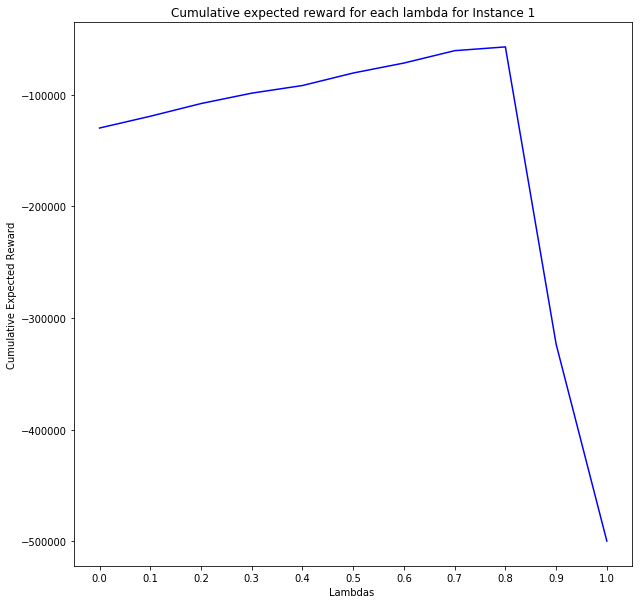

In [235]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(lambdas[:], averageReward[0][:], 'b', label='Instance 0')
# ax.plot(lambdas[:], averageReward[1][:], 'g', label='Instance 1')
ax.set_xticks(lambdas)
ax.set_xlabel('Lambdas ')
ax.set_ylabel('Cumulative Expected Reward')
# ax.legend(['Instance 0'])
ax.set_title('Cumulative expected reward for each lambda for Instance 1')
plt.show()

In [199]:
np.min(averageReward), np.max(averageReward)

(-499982.41999999998, -4138.6199999999999)

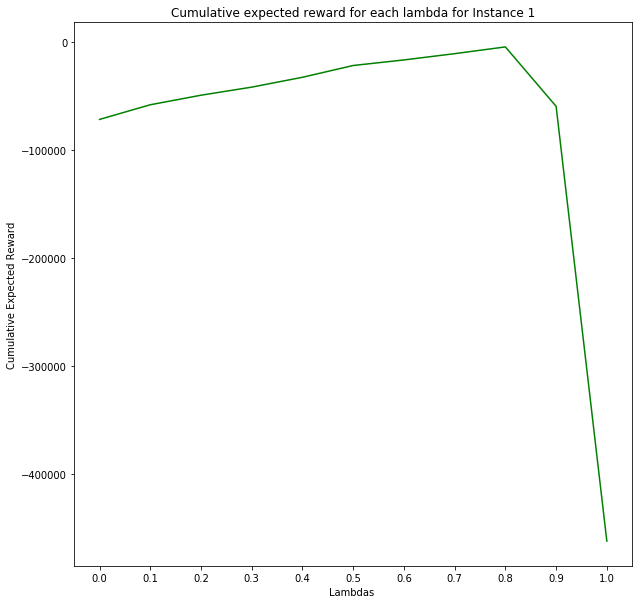

In [234]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
# ax.plot(lambdas[:], averageReward[1][:], 'r', label='Instance 1')
ax.plot(lambdas[:], averageReward[1][:], 'g', label='Instance 1')
ax.set_xticks(lambdas)
ax.set_xlabel('Lambdas ')
ax.set_ylabel('Cumulative Expected Reward')
# ax.legend(['Instance 1'])
ax.set_title('Cumulative expected reward for each lambda for Instance 1')
plt.show()

In [201]:
best_lambda = 0.8
sarsa_best_files = [x for x in os.listdir(resultDir + '/' + 'sarsa') if ('lambda_' + str(best_lambda)) in x ]
ql_best_files = [x for x in os.listdir(resultDir + '/' + 'ql')]

In [202]:
len(sarsa_best_files)

100

In [203]:
len(ql_best_files)

100

In [205]:
np.array([1, 2], dtype=float)

array([ 1.,  2.])

In [206]:
def getPerEpisodeRewards(file):
    f = open(file).readlines()[1]

In [207]:
data_sarsa = np.zeros((2, 50, 500))
data_ql = np.zeros((2, 50, 500))

In [208]:
for file in sarsa_best_files:
    rewards = list(map(int, open(resultDir + '/sarsa/' + file).readlines()[1].strip()[1:-1].split(', ')))
    instance,_, rs = getVarfromFile(file, 'sarsa')
    data_sarsa[instance][rs] = np.array(rewards, dtype=float)

In [209]:
for file in ql_best_files:
    rewards = list(map(int, open(resultDir + '/ql/' + file).readlines()[1].strip()[1:-1].split(', ')))
    instance, rs = getVarfromFile(file, algo='ql')
    data_ql[instance][rs] = np.array(rewards, dtype=float)

In [210]:
data_ql = data_ql.mean(axis=1)

In [211]:
data_ql.shape

(2, 500)

In [212]:
data_sarsa = data_sarsa.mean(axis=1)

In [213]:
data_sarsa.shape

(2, 500)

In [222]:
episodes = list(range(1, 501))

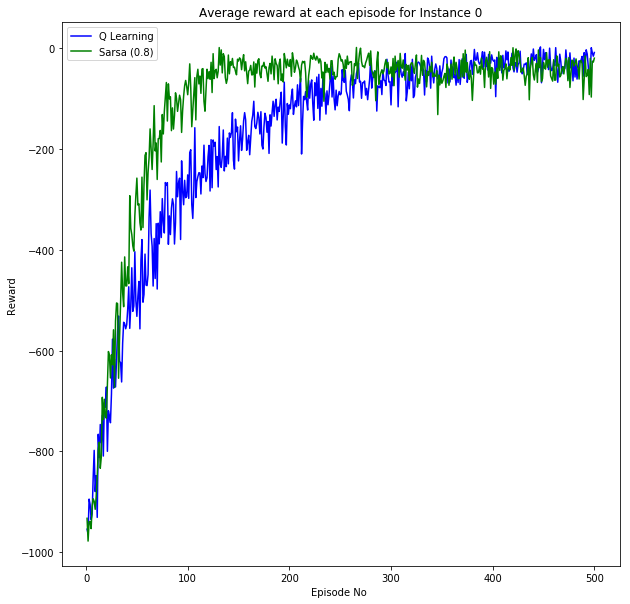

In [233]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(episodes, data_ql[0], 'b', label='Q Learning')
ax.plot(episodes, data_sarsa[0], 'g', label='Sarsa')
ax.set_xlabel('Episode No ')
ax.set_ylabel('Reward')
ax.legend(['Q Learning', 'Sarsa (0.8)'])
ax.set_title('Average reward at each episode for Instance 0')
plt.show()

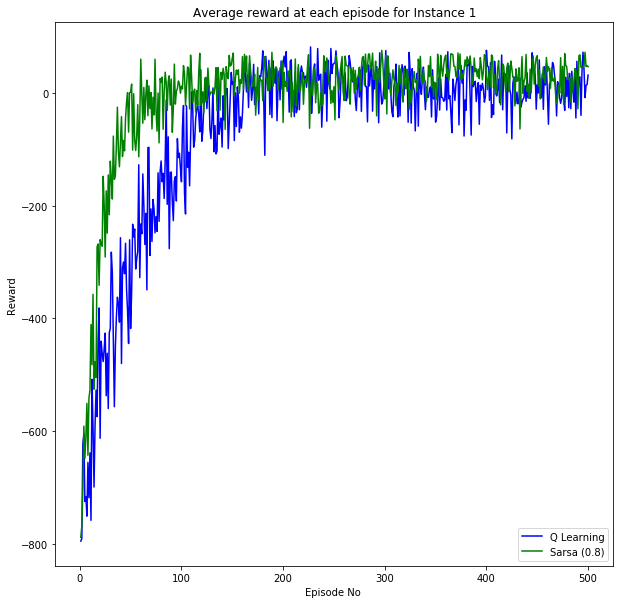

In [232]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(episodes, data_ql[1], 'b', label='Q Learning')
ax.plot(episodes, data_sarsa[1], 'g', label='Sarsa')
ax.set_xlabel('Episode No ')
ax.set_ylabel('Reward')
ax.legend(['Q Learning', 'Sarsa (0.8)'])
ax.set_title('Average reward at each episode for Instance 1')
plt.show()